## 读取 Google 股价

In [1]:
import pandas_datareader
googl = pandas_datareader.get_data_yahoo('GOOGL')

In [2]:
googl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,312.687683,313.013000,310.300293,310.300293,310.300293,2437100
2010-01-04,313.788788,315.070068,312.432434,313.688690,313.688690,3908400
2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003300
2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949400
2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815700


Populating the interactive namespace from numpy and matplotlib


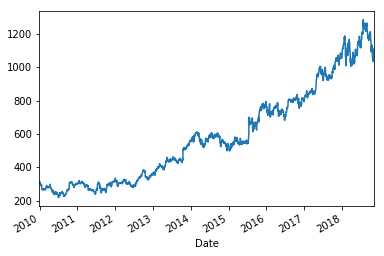

In [3]:
% pylab inline
googl['Close'].plot(kind = 'line')

In [4]:
googl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,312.687683,313.013000,310.300293,310.300293,310.300293,2437100
2010-01-04,313.788788,315.070068,312.432434,313.688690,313.688690,3908400
2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003300
2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949400
2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815700


In [5]:
googl.count()

Open         2232
High         2232
Low          2232
Close        2232
Adj Close    2232
Volume       2232
dtype: int64

In [6]:
googl.to_csv('google_stock_prics.csv')

## 读取Google数据

In [8]:
import pandas
googl = pandas.read_csv('https://github.com/ywchiu/pydeeplearning/raw/master/data/google_stock_prics.csv')
googl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,312.687683,313.013000,310.300293,310.300293,310.300293,2437100
1,2010-01-04,313.788788,315.070068,312.432434,313.688690,313.688690,3908400
2,2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003300
3,2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949400
4,2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815700


## 将数据分为训练与测试数据集

In [9]:
googl.count()

Date         2156
Open         2156
High         2156
Low          2156
Close        2156
Adj Close    2156
Volume       2156
dtype: int64

In [10]:
training_set = googl.iloc[0:2156 - 300, 4:5].values

In [11]:
training_set[0:3]

array([[310.300293],
       [313.68869 ],
       [312.307312]])

In [12]:
training_set.shape

(1856, 1)

In [13]:
test_set = googl.iloc[2156 - 300:, 4:5].values

In [14]:
test_set[0:3]

array([[942.169983],
       [950.5     ],
       [954.650024]])

## 资料标准化

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
training_set_scaled

array([[0.12332848],
       [0.1278684 ],
       [0.12601757],
       ...,
       [0.98731174],
       [0.99277823],
       [1.        ]])

In [17]:
len(training_set_scaled)

1856

In [18]:
import numpy as np
X_train = []
y_train = []
for i in range(60, len(training_set_scaled) ):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train.shape

(1796, 60)

In [20]:
y_train.shape

(1796,)

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
X_train.shape

(1796, 60, 1)

## 建构LSTM神经网路

In [23]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## 训练LSTM

In [24]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0643
Epoch 2/100
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0077
Epoch 3/100
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0040
Epoch 4/100
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 5/100
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 6/100
 100/1796 [>.............................] - ETA: 3s - loss: 0.0041

KeyboardInterrupt: 

## 评估模型在测试数据集的表现

In [104]:
test_set.shape

(300, 1)

In [105]:
test_set = sc.transform(test_set)

In [106]:
test_set[0:3]

array([[0.96993395],
       [0.98109485],
       [0.98665523]])

In [107]:
X_test = []
for i in range(60, len(test_set)):
    X_test.append(test_set[i-60:i, 0])

In [108]:
X_test = np.array(X_test)

In [109]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [110]:
X_test.shape

(240, 60, 1)

In [111]:
predicted_stock_price = regressor.predict(X_test)

In [112]:
predicted_stock_price[0:3]

array([[0.9559624 ],
       [0.95301104],
       [0.95049214]], dtype=float32)

In [113]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [114]:
predicted_stock_price[0:3]

array([[931.7422],
       [929.5394],
       [927.6594]], dtype=float32)

In [120]:
test_set[0:3]

array([[0.96993395],
       [0.98109485],
       [0.98665523]])

In [121]:
len(test_set)

300

In [122]:
real_stock_price = sc.inverse_transform(test_set[60:])

In [123]:
len(real_stock_price)

240

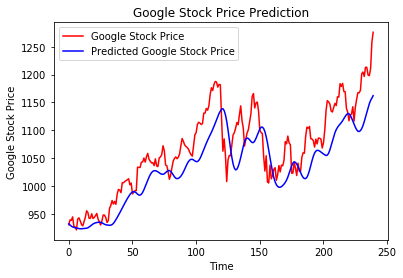

In [124]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price     , color = 'red' , label = 'Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## 评估模型在训练数据集的表现

In [128]:
predicted_stock_price2 = regressor.predict(X_train)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)
real_stock_price2      = training_set[60:]

In [129]:
len(predicted_stock_price2)

1796

In [130]:
len(real_stock_price2)

1796

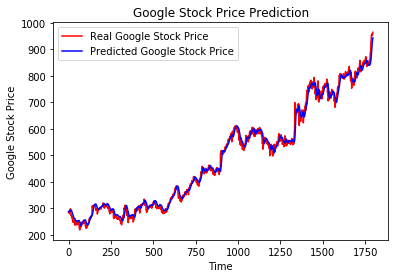

In [131]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price2     , color = 'red' , label = 'Real Google Stock Price')
plt.plot(predicted_stock_price2, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()